In [1]:
# This is a solution for problem set 4, Monetary Economics, University Of Minnesota 05/02/2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameters of the model:

β = 0.96
R = 1/β 
ϕ = 0.2
y = 1
π = 0.5
γ = 5
b_min = 0
b_max = 0.9
b_size = 1000
b_grid = np.linspace(b_min, b_max, b_size)


def u(c):                                               # Utiltiy function.
    return c**(1-γ)/(1-γ)

v_d = (1/(1-β)) * u(y-ϕ)                                # Value of default.
v_0 = (1/(1-β)) * u(y)                                  # Value of no debt. 

def v_rm(b):                                            # Value of repayment in the bad sp.
    return u(y - b) + β * v_0

b_m = np.argmax((v_rm(b_grid)- v_d)<=0)                 # b-, index value of default under bad sp. 

In [4]:
# Guess:

q = 1/R * np.ones(b_size)                               # Price function.
v_rp = (1/(1-β)) * u(y-b_grid)                                      # Guess value of repayment in the good sp.

In [5]:
# Create update functions:

### Given v_rp_0 and q_0 find v_p_1:

def update_vrp(v_rp_0, q_0):
    v_rp1 = np.empty_like(v_rp_0)                       # Allocate memory.
    for b in range(b_size):
        v_rp1[b] = np.max( u(y-b_grid[b]+b_grid*q_0) + β * (π*v_rp_0+(1-π)*v_rm(b_size)) )
    # update b_+:
    for b in range(b_size):
        if v_rp1[b] - v_d <=0:
            b_p = b
            break
        else:
            b_p = b_size 
    return v_rp1, b_p

### Given v_p_1 find E[d_1] as a function of bond holding for next period:

def update_Ed(v_rp1, b_p):
    Ed = np.empty_like(b_grid)
    update = lambda b: 0 if b_m >= b else ((1-π) if b_p >= b > b_m else 1)
    for b in range(b_size):
        Ed[b] = update(b)
    return Ed 

### Given d_1 update q_1: 

def update_q(Ed):
    q_1 = 1/R * (1 - Ed)
    return q_1

In [6]:
# Iterate until convergence:
iter = 0 
error_1 = 10
error_2 = 10
α_q = 1
α_vrp = 1 

while error_1 > 10e-10 or error_2 > 10e-10:
    v_rp_1 = update_vrp(v_rp, q)[0]
    b_p = update_vrp(v_rp, q)[1]
    E_d = update_Ed(v_rp_1, b_p)
    q_1 = update_q(E_d)
    error_1 = np.max(np.abs(v_rp - v_rp_1))
    error_2 = np.max(np.abs(q_1 - q))
    # update:
    v_rp = α_vrp * v_rp_1.copy() + (1-α_vrp) * v_rp.copy()
    q = α_q *q_1.copy() + (1-α_q) * q.copy()
    print(iter, error_1, error_2)
    iter =+ 1

0 62473.999153873636 0.96
1 16.586570516146583 0.48
1 1.8471860043484218 0.0
1 0.3033916234073075 0.0
1 0.12626303955114082 0.0
1 0.0606062589845493 0.0
1 0.029091004312585156 0.0
1 0.013963682070041727 0.0
1 0.00670256739362074 0.0
1 0.003217232348939447 0.0
1 0.0015442715274911478 0.0
1 0.0007412503331973852 0.0
1 0.0003558001599355265 0.0
1 0.00017078407676951457 0.0
1 8.1976356849367e-05 0.0
1 3.93486512884067e-05 0.0
1 1.8887352618790487e-05 0.0
1 9.065929257978667e-06 0.0
1 4.351646044398194e-06 0.0
1 2.0887901026611644e-06 0.0
1 1.002619249845793e-06 0.0
1 4.81257240281252e-07 0.0
1 2.310034767916136e-07 0.0
1 1.1088167006789718e-07 0.0
1 5.3223201845753465e-08 0.0
1 2.5547137738612946e-08 0.0
1 1.2262626469805582e-08 0.0
1 5.886062304227835e-09 0.0
1 2.8253097639208136e-09 0.0
1 1.3561489708990848e-09 0.0
1 6.509530692255794e-10 0.0


In [9]:
b_m, b_p

(661, 1000)

<function matplotlib.pyplot.show(close=None, block=None)>

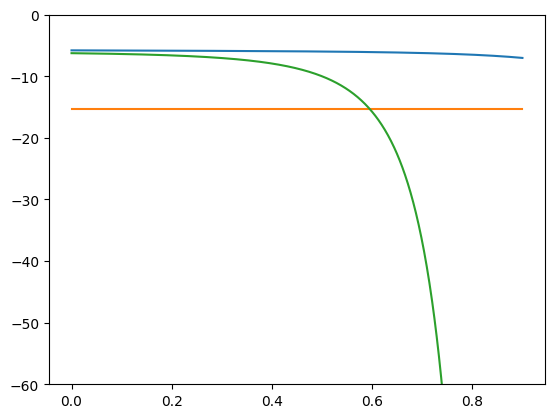

In [13]:
plt.plot(b_grid, v_rp)
plt.plot(b_grid, v_d * np.ones(b_size))
plt.plot(b_grid, v_rm(b_grid))
plt.ylim([-60,0])
plt.show
